In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams.update({
    "font.size": 14,
    "font.family": "serif", 
    "mathtext.fontset": "cm"})

## Line Plots

In [3]:
current = np.arange(0,5)

In [4]:
current

array([0, 1, 2, 3, 4])

In [5]:
voltage = 2 * current

Text(0, 0.5, 'VOLTAGE')

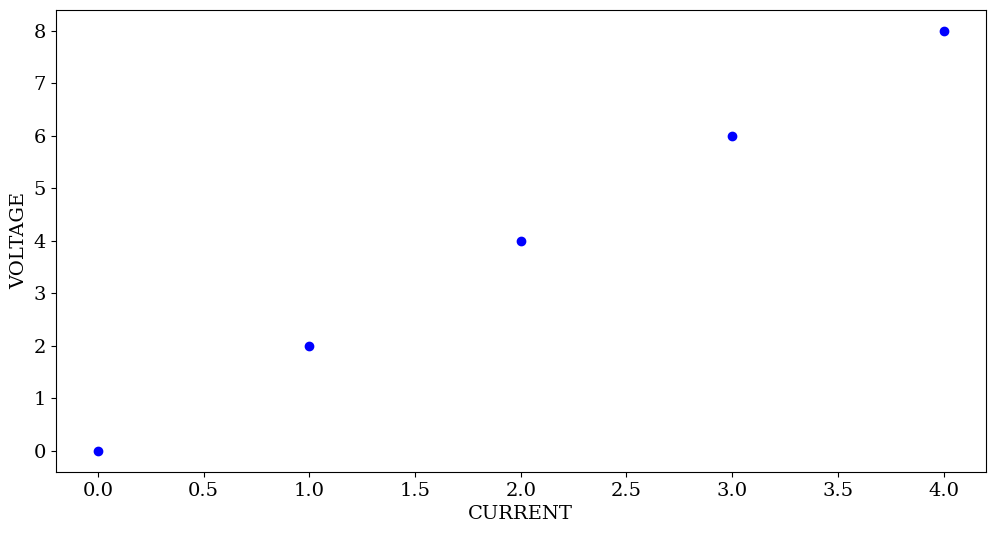

In [6]:
plt.figure(figsize=(12,6))
plt.plot(current, voltage, marker='o', linestyle='None', markerfacecolor='blue', markeredgecolor='blue')
# plt.plot(current, voltage, marker='o', markerfacecolor='red', linewidth=2))
plt.xlabel(r'CURRENT')
plt.ylabel(r'VOLTAGE')

In [7]:
current_model = np.linspace(0,10)
voltage_model = 2 * current_model

(-1.0, 22.0)

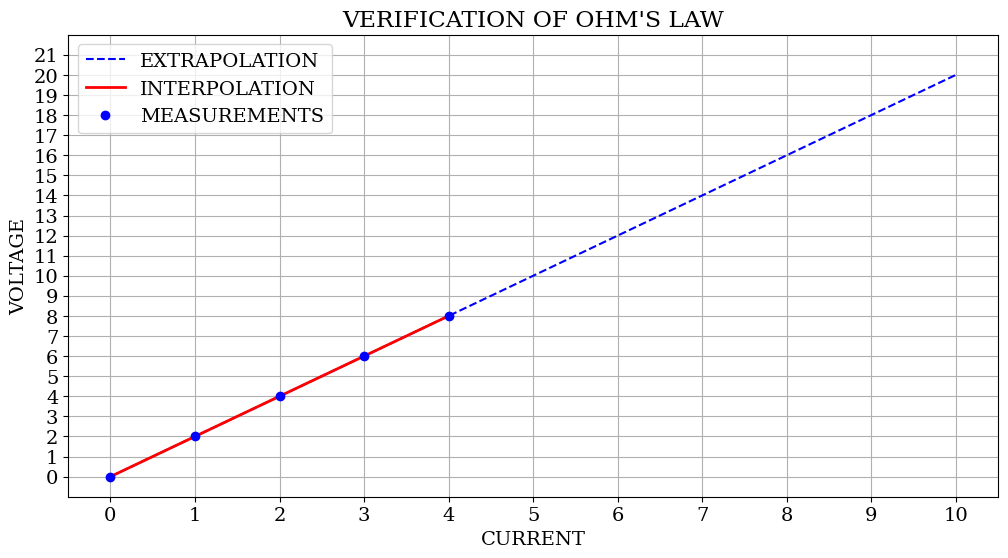

In [8]:
plt.figure(figsize=(12,6))
plt.plot(current_model, voltage_model, linestyle='--', color='blue', label=r'EXTRAPOLATION')
plt.plot(current, voltage, color='red', linewidth=2, label=r'INTERPOLATION')
plt.plot(current, voltage, marker='o', linestyle='None', markerfacecolor='blue', markeredgecolor='blue', label=r'MEASUREMENTS')

plt.title(r"VERIFICATION OF OHM'S LAW")
plt.xlabel(r'CURRENT')
plt.ylabel(r'VOLTAGE')

plt.xticks(np.arange(0,11))
plt.yticks(np.arange(0,22))

plt.grid()
plt.legend()

plt.xlim([-0.5,10.5])
plt.ylim([-1,22])

# plt.savefig('ohm.pdf', format='pdf', bbox_inches='tight')

## Sample Data

In [9]:
data = pd.read_csv('../data/sample_data.csv')

In [10]:
data.head()

,column_a,column_b,column_c
0,1,1,10
1,2,4,8
2,3,9,6
3,4,16,4
4,5,25,2


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   column_a  5 non-null      int64
 1   column_b  5 non-null      int64
 2   column_c  5 non-null      int64
dtypes: int64(3)
memory usage: 248.0 bytes


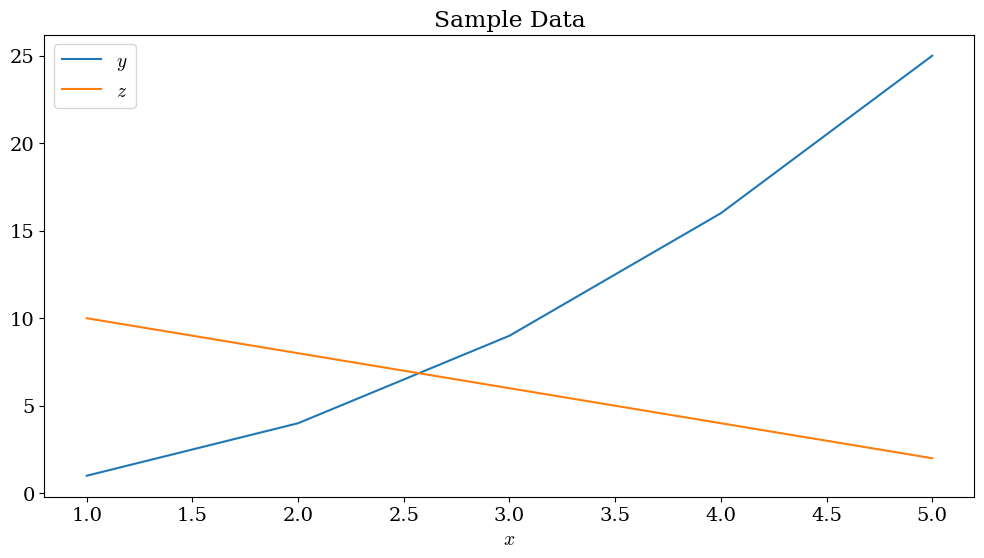

In [12]:
plt.figure(figsize=(12,6))
plt.plot(data.column_a, data.column_b, label=r'$y$')
plt.plot(data.column_a, data.column_c, label=r'$z$')
plt.legend()
plt.title(r'Sample Data')
plt.xlabel(r'$x$')
plt.show();

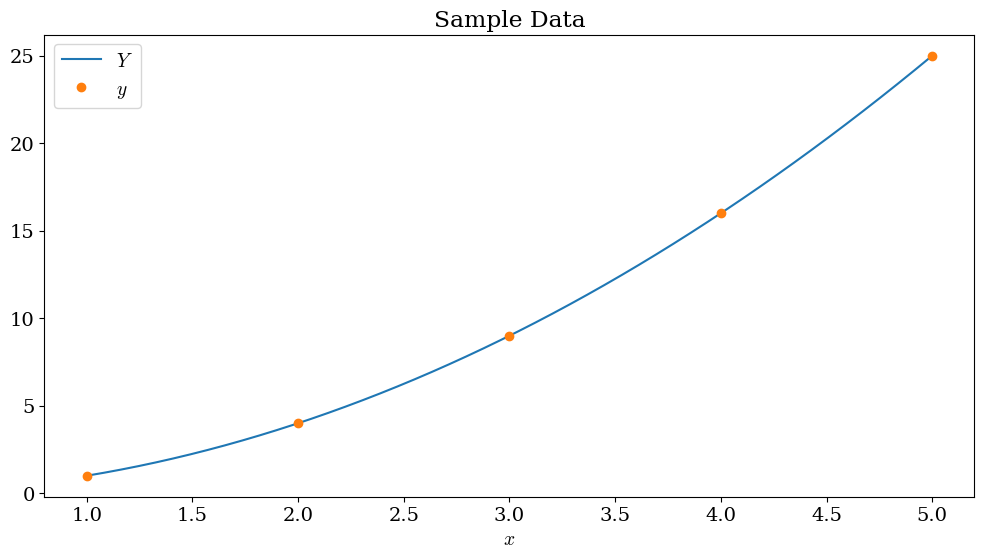

In [13]:
plt.figure(figsize=(12,6))
plt.plot(np.linspace(1,5), np.linspace(1,5)**2, label=r'$Y$')
plt.plot(data.column_a, data.column_b, 'o', label=r'$y$')
plt.legend()
plt.title(r'Sample Data')
plt.xlabel(r'$x$')
plt.show()

## Population Data

In [14]:
population = pd.read_csv('../data/countries.csv')
population.head()

,country,year,population
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460


In [15]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     1704 non-null   object
 1   year        1704 non-null   int64 
 2   population  1704 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 40.1+ KB


In [16]:
indian = population[population.country == 'India']
chinese = population[population.country == 'China']

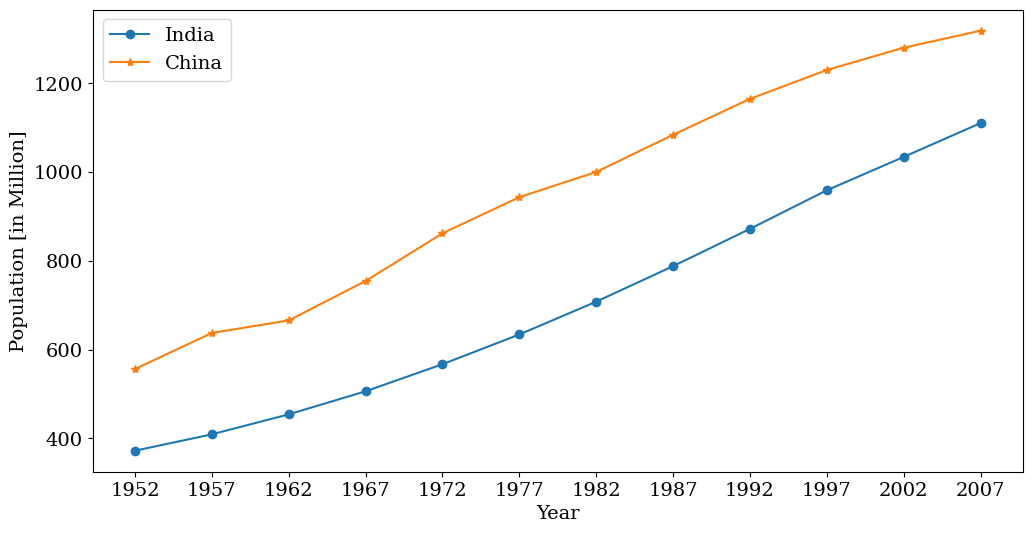

In [20]:
plt.figure(figsize=(12,6))
plt.plot(indian.year, indian.population / 10**6, '-o', label=r'India')
plt.plot(chinese.year, chinese.population / 10**6, '-*', label=r'China')
plt.legend()

plt.ylabel(r'Population [in Million]')
plt.xlabel(r'Year')

plt.xticks(indian.year)

plt.show()

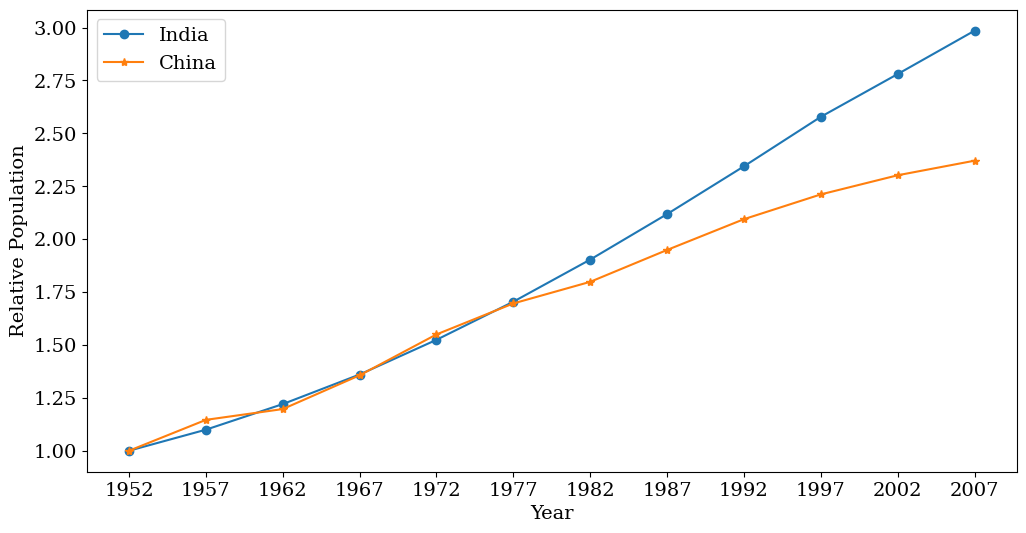

In [21]:
plt.figure(figsize=(12,6))
plt.plot(indian.year, indian.population / indian.population.iloc[0], '-o', label=r'India')
plt.plot(chinese.year, chinese.population / chinese.population.iloc[0], '-*', label=r'China')
plt.legend()

plt.ylabel(r'Relative Population')
plt.xlabel(r'Year')

plt.xticks(indian.year)

plt.show()

**Checkpoint:** Can you make any inferences from this plot?

In [22]:
start = population[(population.year == 1952) & (population.population > 3e7)]
# start = population[(population.year == 1952) & (population.population > 3e7)].sort_values(by=['population'],ascending=False)
# start = population[(population.year == 1952) & (population.population > 3e7)].sort_values(by=['population'],ascending=False).iloc[:10]

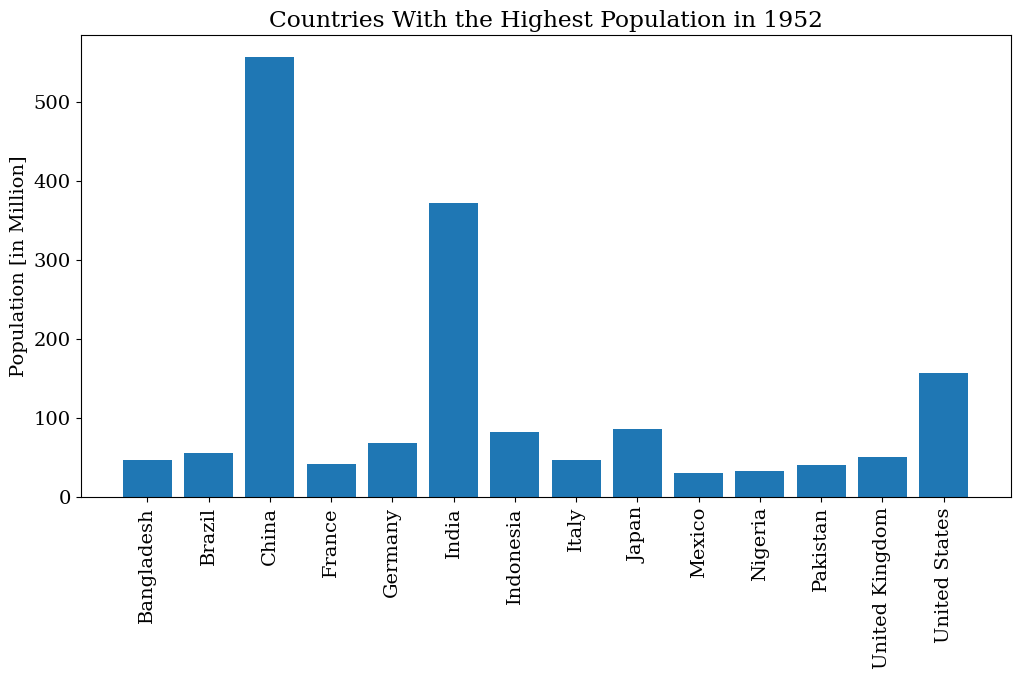

In [23]:
plt.figure(figsize=(12,6))
plt.bar(start.country, start.population / 1e6)
plt.title(r'Countries With the Highest Population in 1952')
plt.ylabel(r'Population [in Million]')
plt.xticks(rotation = 90);

In [24]:
end = population[(population.year == 2007) & (population.population > 3e7)]
# end = population[(population.year == 2007) & (population.population > 3e7)].sort_values(by=['population'],ascending=False)
# end = population[(population.year == 2007) & (population.population > 3e7)].sort_values(by=['population'],ascending=False).iloc[:10]

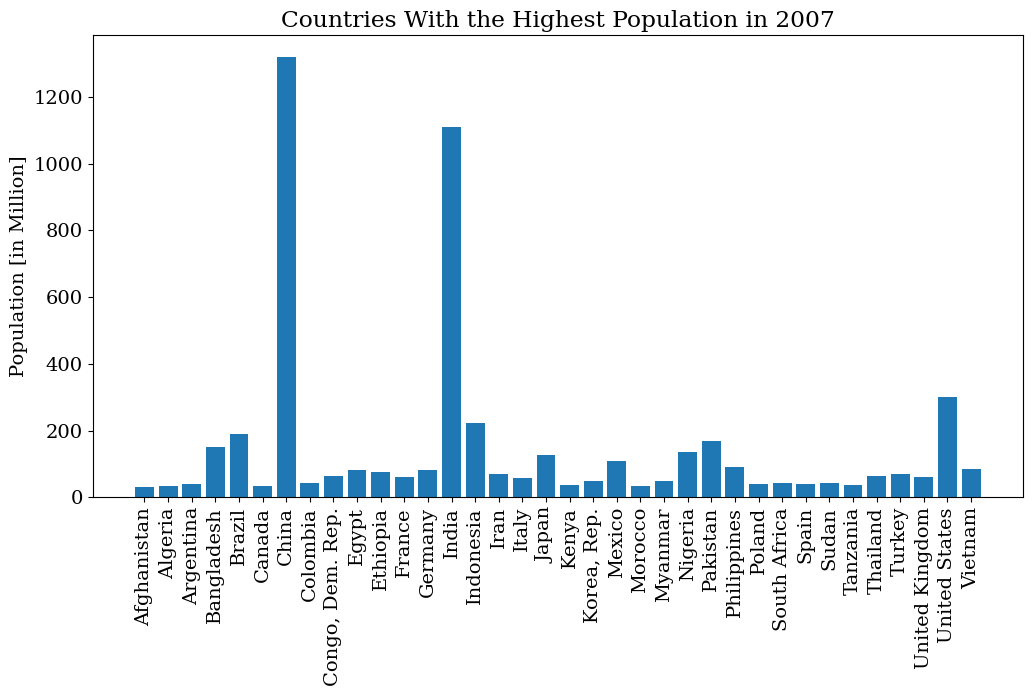

In [25]:
plt.figure(figsize=(12,6))
plt.bar(end.country, end.population / 1e6)
plt.title(r'Countries With the Highest Population in 2007')
plt.ylabel(r'Population [in Million]')
plt.xticks(rotation = 90);

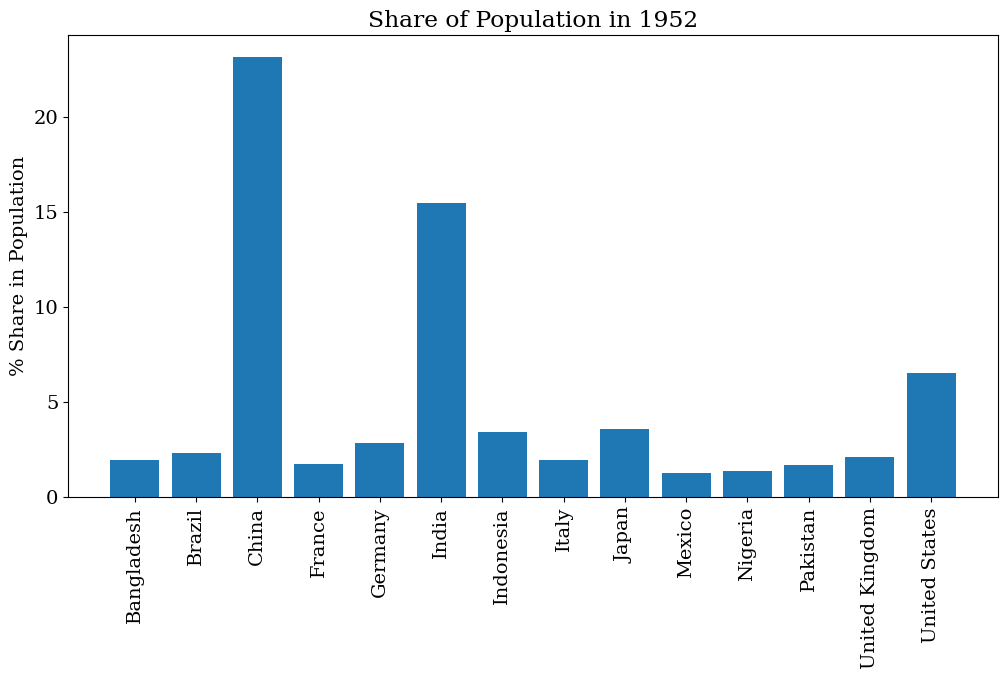

In [26]:
plt.figure(figsize=(12,6))
plt.bar(start.country, start.population / population[population.year==1952].population.sum() * 100)
plt.title(r'Share of Population in 1952')
plt.ylabel(r'% Share in Population')
plt.xticks(rotation = 90);

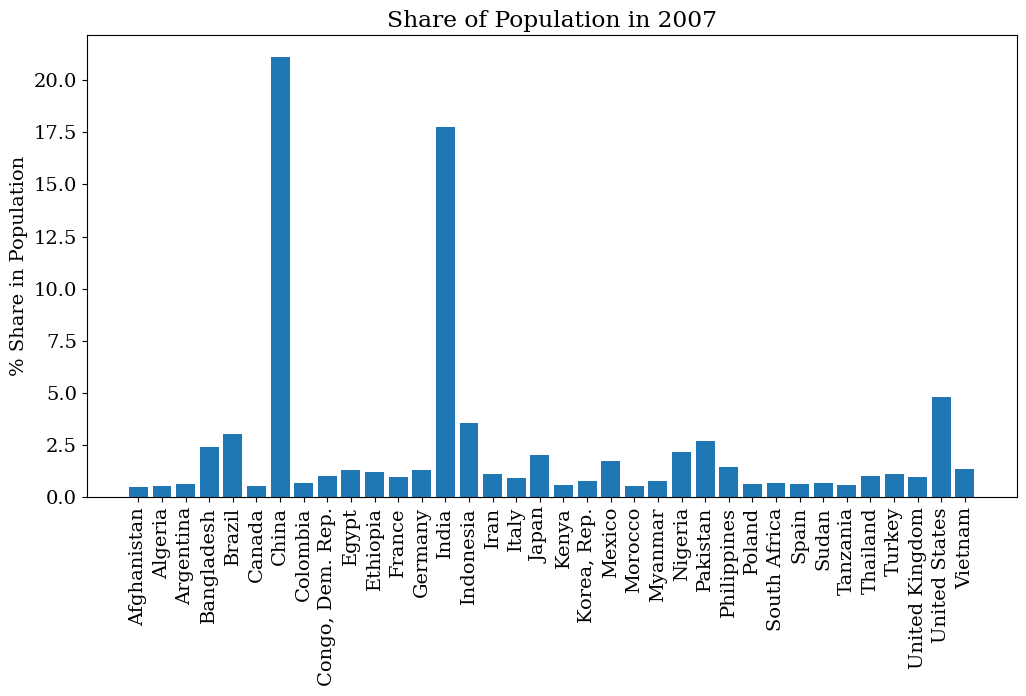

In [27]:
plt.figure(figsize=(12,6))
plt.bar(end.country, end.population / population[population.year==2007].population.sum() * 100)
plt.title(r'Share of Population in 2007')
plt.ylabel(r'% Share in Population')
plt.xticks(rotation = 90);

## Gas Prices

In [28]:
gas_data = pd.read_csv('../data/gas_prices.csv')
gas_data.head()

,Year,Australia,Canada,France,Germany,Italy,Japan,Mexico,South Korea,UK,USA
0,1990,NaN,1.87,3.63,2.65,4.59,3.16,1.00,2.05,2.82,1.16
1,1991,1.96,1.92,3.45,2.90,4.50,3.46,1.30,2.49,3.01,1.14
2,1992,1.89,1.73,3.56,3.27,4.53,3.58,1.50,2.65,3.06,1.13
3,1993,1.73,1.57,3.41,3.07,3.68,4.16,1.56,2.88,2.84,1.11
4,1994,1.84,1.45,3.59,3.52,3.70,4.36,1.48,2.87,2.99,1.11


In [29]:
gas_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         19 non-null     int64  
 1   Australia    18 non-null     float64
 2   Canada       19 non-null     float64
 3   France       19 non-null     float64
 4   Germany      19 non-null     float64
 5   Italy        19 non-null     float64
 6   Japan        19 non-null     float64
 7   Mexico       19 non-null     float64
 8   South Korea  19 non-null     float64
 9   UK           19 non-null     float64
 10  USA          19 non-null     float64
dtypes: float64(10), int64(1)
memory usage: 1.8 KB


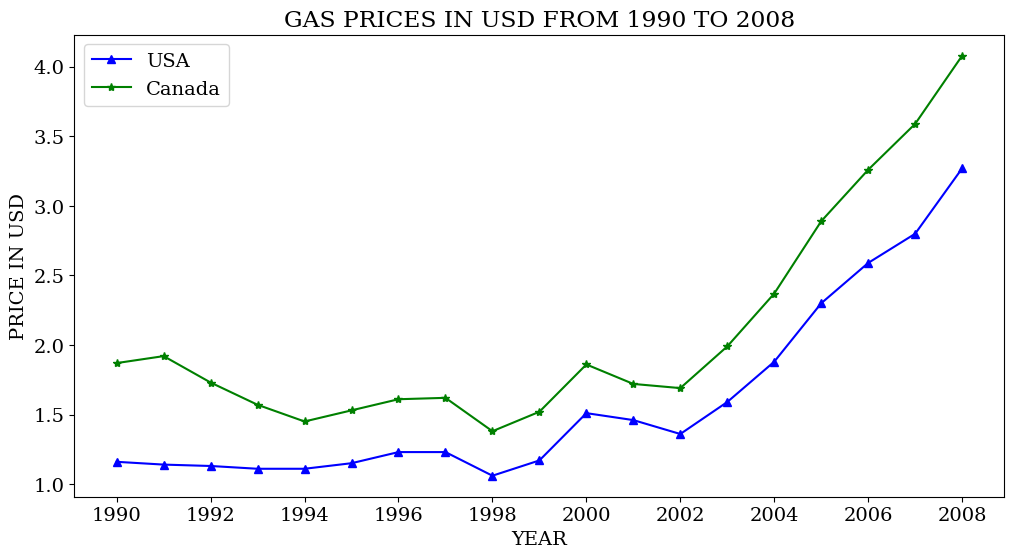

In [30]:
plt.figure(figsize=(12,6))
# plt.plot(gas_data.Year, gas_data.Australia, label=r'Australia')
# plt.plot(gas_data.Year, gas_data.UK, label=r'UK')
plt.plot(gas_data.Year, gas_data.USA, 'b^-', label=r'USA')
plt.plot(gas_data.Year, gas_data.Canada, 'g*-', label=r'Canada')

plt.legend()

plt.title(r'GAS PRICES IN USD FROM 1990 TO 2008')

plt.xlabel(r'YEAR')
plt.ylabel(r'PRICE IN USD')

plt.xticks(gas_data.Year[::2]);

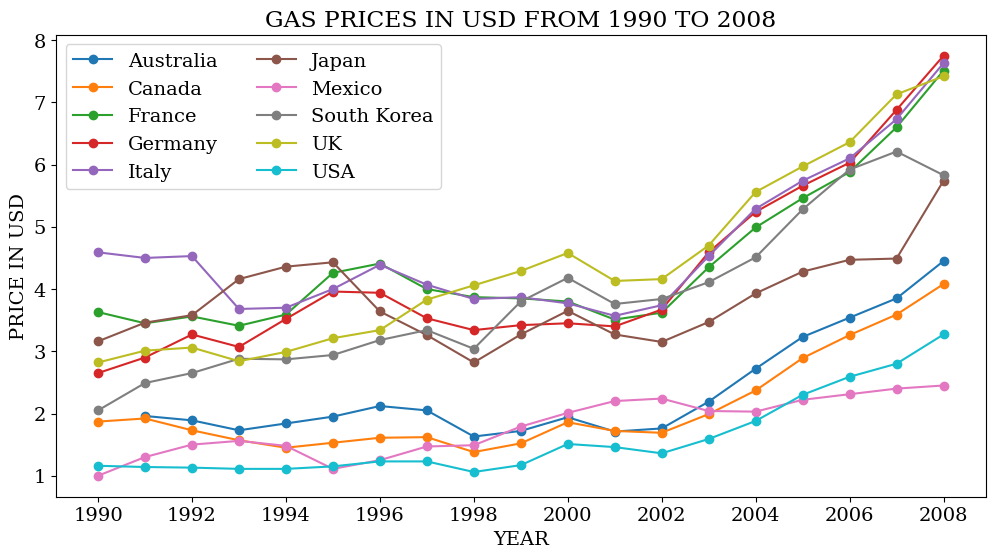

In [31]:
plt.figure(figsize=(12,6))
for country in gas_data:
    if country != 'Year':
        plt.plot(gas_data.Year, gas_data[country], 'o-', label=country)

plt.legend(ncol=2)

plt.title(r'GAS PRICES IN USD FROM 1990 TO 2008')

plt.xlabel(r'YEAR')
plt.ylabel(r'PRICE IN USD')

plt.xticks(gas_data.Year[::2]);

### Summarising Gas Prices

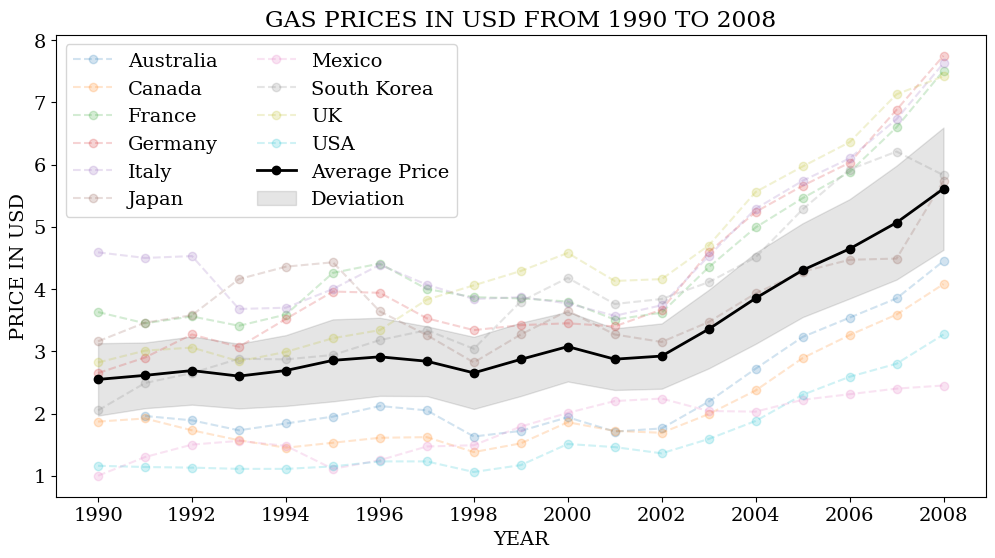

In [32]:
plt.figure(figsize=(12,6))
for country in gas_data:
    if country != 'Year':
        plt.plot(gas_data.Year, gas_data[country], 'o--', label=country, alpha=0.2)

mean_price = gas_data.drop(['Year'], axis=1).mean(axis=1)
std_price = gas_data.drop(['Year'], axis=1).std(axis=1)
plt.plot(gas_data.Year, mean_price, 'ko-', linewidth=2, label=r'Average Price')
plt.fill_between(gas_data.Year, mean_price-0.5*std_price, mean_price+0.5*std_price, color='black', label=r'Deviation', alpha=0.1)

plt.legend(ncol=2)

plt.title(r'GAS PRICES IN USD FROM 1990 TO 2008')

plt.xlabel(r'YEAR')
plt.ylabel(r'PRICE IN USD')

plt.xticks(gas_data.Year[::2]);

## FIFA Players

In [33]:
fifa_players = pd.read_csv('../data/fifa_data.csv')
fifa_players.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [34]:
fifa_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

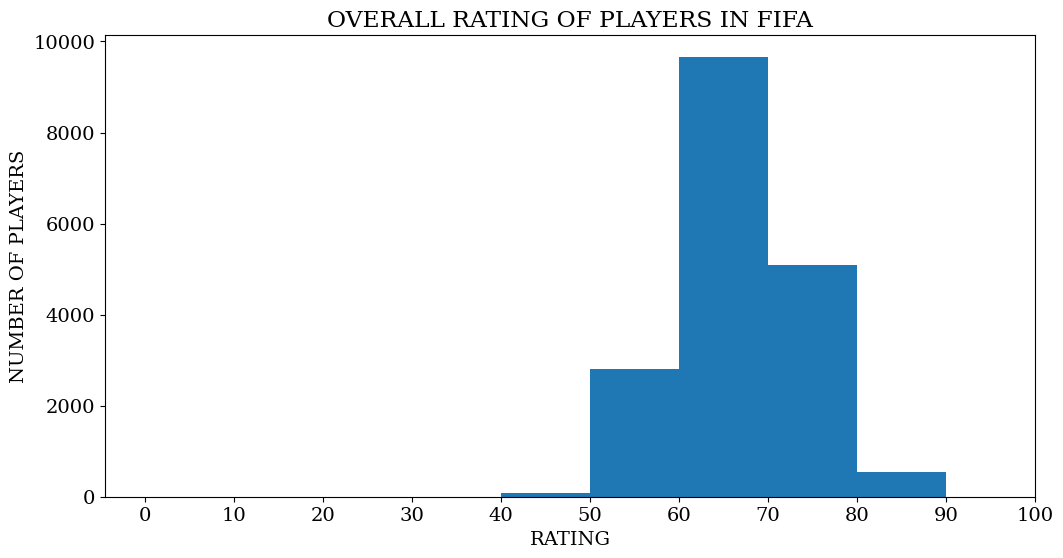

In [35]:
plt.figure(figsize=(12,6))

plt.hist(fifa_players.Overall, bins=np.arange(0,100,10))

plt.title(r'OVERALL RATING OF PLAYERS IN FIFA')
plt.xlabel(r'RATING')
plt.ylabel(r'NUMBER OF PLAYERS')

plt.xticks(np.arange(0,110,10));

In [40]:
lefties = fifa_players.loc[fifa_players['Preferred Foot'] == 'Left'].count()[0]
righties = fifa_players.loc[fifa_players['Preferred Foot'] == 'Right'].count()[0]

Text(0.5, 1.0, 'PREFERRED FOOT OF PLAYERS IN FIFA')

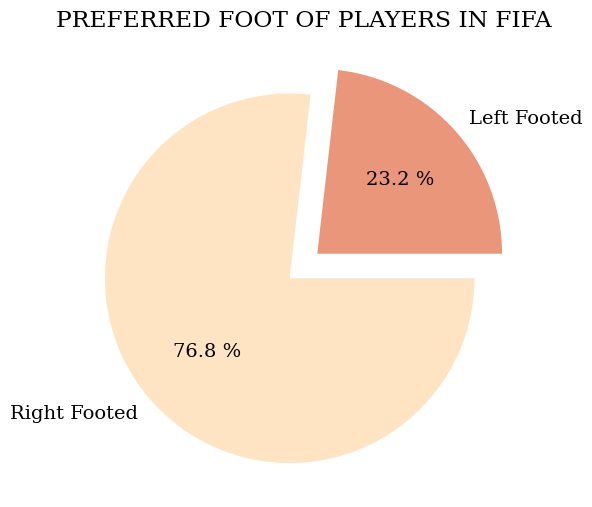

In [70]:
plt.figure(figsize=(12,6))
plt.pie([lefties, righties], labels=['Left Footed', 'Right Footed'], colors=['darksalmon','bisque'], autopct='%.1f %%', explode=(.1,.1))
plt.title(r'PREFERRED FOOT OF PLAYERS IN FIFA')
